# Robert Swain's jury

In 1963, a court in Talladega County, Alabama convicted a young black man
called Robert Swain sentenced him to death. He appealed his sentence, citing
among other factors the all-white jury. At the time, only men aged 21 or older
were allowed to serve on juries in Talladega County. In the county, 26% of the
eligible jurors were black, but there were only 8 black men among the 100
selected for the jury panel in Swain's trial.  The jury results from
a selection process from the jury panel. No black man was selected for the
trial jury.

In 1965, the Supreme Court of the United States [denied Swain's
appeal](https://en.wikipedia.org/wiki/Swain_v._Alabama). In its ruling, the
Court wrote "... the overall percentage disparity has been small and reflects
no studied attempt to include or exclude a specified number of Negroes."

The grounds of the appeal were that the jury *panel* (8 of 100 black men) was not representative of the population of the country, as was required by law.

Here we investigate the *jury* (0 out of 12) black men.  Is 0 out 12 a surprising number?   If we took a random sample of 12 people from a population where 26% of them were black, how often would we see no black people in the sample of 12?

In [1]:
# Some preliminaries.  We don't expect the student to understand
# these until later in the course.
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

We need to work out some way of simulating the process of taking a random
person from a population where there is a 26% chance of the person being
black.

If there was a 50% chance that the person was black, then we could do a coin toss to decide if our simulated juror was black. We might decide that heads means a black juror, and tails means a white juror.

If there was a 25% chance, then we could do two coin tosses.  We could decided that two heads meant a black juror, and one or zero heads means a white juror.

For 26%, we need something with a finer grain.

One way is to take random numbers between 0 and 1.  We could say that we have
a black juror if the number is less than 0.26 (which will happen 26% of the
time).

Here's how to get a random number between 0 and 1.

We can run this cell a few times to show that we get different numbers, between 0 and 1.

In [2]:
npr.uniform()

0.8720439749384046

We are going to need to store this number for later use.  We can do that by attaching a label to it, such as "juror".  Then we can refer to the number by its label.  This is like a register in a calculator, or a cell in an Excel spreadsheet (A1, B9 etc would be the labels).

In [3]:
juror = npr.uniform()
juror

0.2400291209392027

Now we need to decide if the number is less than 0.26.  If so our simulation has found a black juror, otherwise we have a white juror.

In [4]:
juror < 0.26

True

Let's put those two lines of code together, to make a new random number, and then check if it is less than 0.26.  We can run this a few times to see that we get `True` about 26% of the time.

In [5]:
juror = npr.uniform()
juror < 0.26

False

Of course we could run the cell above 12 times, and write down how many `True` values we see, but we'd like the computer to automate that for us.  In fact, we can ask the computer to make 12 random numbers at once, like this:

In [6]:
jurors = npr.uniform(size=12)
jurors

array([0.22180676, 0.1797728 , 0.61926017, 0.26107045, 0.78220271,
       0.95995897, 0.08575194, 0.76324708, 0.82328335, 0.97454009,
       0.21991182, 0.29153669])

And we can ask whether each of these numbers is less than 0.26, all in one go, like this:

In [7]:
jurors = npr.uniform(size=12)
jurors < 0.26

array([False,  True, False, False, False, False, False, False, False,
       False, False,  True])

The comparison returns a sequence of 12 `True` or `False` values, where the `True` values correspond to random numbers that were less than 0.26, and the `False` values correspond to numbers that were greater than or equal to 0.26.

Then, the `True` and `False` values indicate a black juror and a white juror respectively.

We might want to make a label for this set of 12 `True` and `False` values,
like this:

In [8]:
jurors = npr.uniform(size=12)
is_black = jurors < 0.26
is_black

array([False, False, False, False, False, False, False, False,  True,
        True, False, False])

The `is_black` label points to 12 values which can be either `True` or `False`.  The `True` values correspond to a black juror.  We want to count how many black jurors we found, which means counting the number of `True` values.  We can do this with the `count_nonzero` function, like this:

In [9]:
np.count_nonzero(is_black)

2

We pull these three lines together to make a single cell to make a jury of 12 people, decide if each juror is black or white, and count the number of simulated black jurors.

We can run this a few times to get an idea of how many times we see the value 0 (no black jurors in the jury of 12):

In [10]:
jurors = npr.uniform(size=12)
is_black = jurors < 0.26
np.count_nonzero(is_black)

2

Rather than repeat these steps manually, we'd like the computer to do that for
us.

Let's say we want to repeat these steps 10 times, to make 10 simulated juries.

We can first make a sequence of 10 values of 0, to store our counts.  When we have finished all our steps below, the first value will be the count of black jurors in the first jury we simulated, the second will be the count of black jurors in the second sample we simulated, and so on.

In [11]:
counts = np.zeros(10, int)
counts

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Now we use *loop* to repeat the steps above 10 times, and record the count of black jurors for each of these 10 simulated juries.

In [12]:
counts = np.zeros(10, int)
for i in range(10):
    # Repeating the steps to simulated a jury.
    jurors = npr.uniform(size=12)
    is_black = jurors < 0.26
    # Store the count of black jurors for this jury.
    counts[i] = np.count_nonzero(is_black)
counts

array([4, 4, 0, 5, 7, 4, 5, 3, 1, 3])

How many of these 10 juries had 0 black jurors?

The other way to ask this, is how may of the sequence of values in `counts` is equal to 0.

We can ask which values are equal to 0 like this:

In [13]:
counts == 0

array([False, False,  True, False, False, False, False, False, False,
       False])

Now we have 10 `True` or `False` values where the `True` values correspond to counts that were equal to 0.

The result in this case depends on our random numbers, but it turns out a count of 0 is a pretty rare value in these simulated juries, so there may well be no `True` values in `counts == 0` above.

We can ask how many of the counts were equal to 0, like this:

In [14]:
np.count_nonzero(counts == 0)

1

Now we have everything we need to do a much larger simulation.  We can simulate 10000 juries, in the blink of an eye.

In [15]:
# Make 10000 zeros, to store the counts for our 10000 juries.
counts = np.zeros(10000, int)
for i in range(10000):
    jurors = npr.uniform(size=12)
    is_black = jurors < 0.26
    counts[i] = np.count_nonzero(is_black)
counts

array([3, 3, 2, ..., 4, 6, 1])

We can do a histogram of the counts, to see which counts are common, and which are less common.

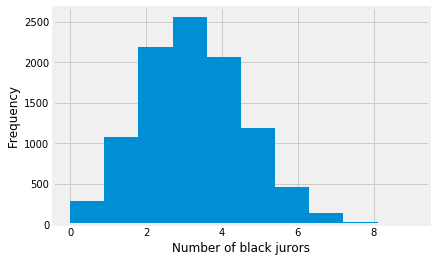

In [16]:
plt.hist(counts)
plt.xlabel('Number of black jurors')
plt.ylabel('Frequency');

It looks like 0 is fairly uncommon.   How uncommon is it, exactly?

Here we count how many of the 10000 juries had exactly 0 black jurors:

In [17]:
n_with_0_black = np.count_nonzero(counts == 0)
n_with_0_black

282

What is the chance that any one jury will have 0 black jurors?  It is just the number of simulations that generated that result, divided by the total number of simulations.

In [18]:
n_with_0_black / 10000

0.0282

This implies that 0 is a fairly unusual number of black jurors, given our
model.

Our model was that the jury members were chosen at random from the population
where 26% were black.

Maybe our model is wrong?  Maybe the jury members were not chosen at random?